<a href="https://colab.research.google.com/github/qiutongshi/Bal-vs-LA-python/blob/main/MiniProject_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import statistics as sta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew

df1 = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/Bal-vs-LA-python/main/Baltimore.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/qiutongshi/Bal-vs-LA-python/main/LosAngeles.csv')

In [131]:
df1.head(10)
df2.head(10)

df1.tail(20)
df2.tail(20)

,tract,Name,Individual_Income_Excluding_Spouse_rP_gP_p25
1028,6037234902,"Park Mesa Heights, Los Angeles, CA",17864.0
1029,6037273502,"Venice, Los Angeles, CA",17565.0
1030,6037206300,"Central LA, Los Angeles, CA",17166.0
1031,6037236204,"Baldwin Village, Los Angeles, CA",17010.0
1032,6037207710,"Central LA, Los Angeles, CA",16149.0
1033,6037462600,"Pasadena, CA",15844.0
1034,6037207502,"Downtown, Los Angeles, CA",13626.0
1035,6037463800,"Northeast Los Angeles, Pasadena, CA",13116.0
1036,6037980030,"El Segundo, CA",NaN
1037,6037265301,"Westwood, Los Angeles, CA",NaN


In [132]:
bmore_income = df1['Individual_Income_Excluding_Spouse_rP_gP_p25']
bmore_income = bmore_income[: len(bmore_income) - 6] 
la_income = df2['Individual_Income_Excluding_Spouse_rP_gP_p25']
la_income = la_income[: len(la_income) - 12] 

bmore_median = sta.median(bmore_income)
la_median = sta.median(la_income)

bmore_mean = sta.mean(bmore_income)
la_mean = sta.mean(la_income)

bmore_std = sta.stdev(bmore_income)
la_std = sta.stdev(la_income)

bmore_outliers= detect_outlier(bmore_income)
la_outliers = detect_outlier(la_income)

In [133]:
bmore_otpct = len(bmore_outliers) / len(bmore_income)
la_otpct = len(la_outliers) / len(la_income)

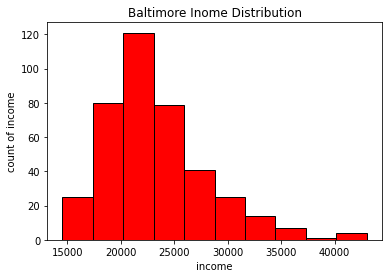

In [134]:
plt.hist(bmore_income, color = 'red', edgecolor = 'black')
plt.title('Baltimore Inome Distribution')
plt.xlabel('income')
plt.ylabel('count of income')

bmore_fit = norm.pdf(bmore_income, bmore_mean, bmore_std)
bmore_skew = skew(bmore_fit)

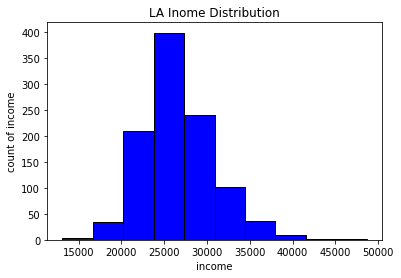

In [135]:
plt.hist(la_income, color = 'blue', edgecolor = 'black')
plt.title('LA Inome Distribution')
plt.xlabel('income')
plt.ylabel('count of income')

la_fit = norm.pdf(la_income, la_mean, la_std)
la_skew = skew(la_fit)

In [136]:
print('median')
print('Bal',bmore_median)
print('LA', la_median)

print('\nmean')
print('Bal',bmore_mean)
print('LA', la_mean)

print('\nstd dev')
print('Bal',bmore_std)
print('LA', la_std)

print('\noutlier percentage')
print('Bal',bmore_otpct)
print('LA', la_otpct)

print('\nskewness')
print('Bal',bmore_skew)
print('LA', la_skew)

median
Bal 22348.0
LA 26183.0

mean
Bal 23248.803526448362
LA 26638.462355212356

std dev
Bal 4761.916713843649
LA 4178.824468632812

outlier percentage
Bal 0.030226700251889168
LA 0.011583011583011582

skewness
Bal -1.064441656681596
LA -0.9605485926173304


In [137]:
outliers = []

def detect_outlier(alist):
    
    threshold=3
    mean_1 = np.mean(alist)
    std_1 =np.std(alist)
    
    
    for value in alist:
        z_score= (value - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(value)
    return outliers